# Demo End-to-End de Mytorch

Esta demostración valida la implementación completa de la librería `mytorch` con visualizaciones interactivas.

### Componentes Validados:
- **Linear**: Capas densas con propagación hacia adelante y hacia atrás.
- **ReLU**: Activación no lineal.
- **BatchNorm1d**: Normalización de lotes (vital para estabilidad en redes profundas).
- **CrossEntropyLoss**: Función de pérdida para clasificación de múltiples clases.
- **SGD (con Momentum)**: Optimizador para el descenso de gradiente estocástico.

**Nota**: Se incluye una clase `CompatibleSGD` y una función de inicialización de pesos dentro del notebook para asegurar que la demo funcione perfectamente sin alterar los archivos base de tu tarea.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
import os
from sklearn.datasets import make_moons, make_circles

# Asegurar que la librería sea importable
sys.path.append(os.getcwd())

from mytorch.nn import Sequential, Linear, GeLU, ReLU, SoftMax, BatchNorm1d, CrossEntropyLoss
from mytorch.optim import SGD, Adam

print("Librerías de MyTorch cargadas correctamente (API Moderna).")

Librerías de MyTorch cargadas correctamente (API Moderna).


## Utilidades de Entrenamiento
Definimos un bucle de entrenamiento genérico y funciones de visualización.

In [7]:
def train_model(X, Y, model, optimizer, criterion, epochs=200, plot_every=50):
    losses = []
    print(f"Iniciando entrenamiento por {epochs} épocas...")
    
    for epoch in range(epochs):
        # Forward pass
        out = model.forward(X)
        loss = criterion.forward(out, Y)
        losses.append(loss)
        
        # Backward pass
        grad = criterion.backward()
        model.backward(grad)
        
        # Optimization step
        optimizer.step()
        
        if epoch % plot_every == 0:
            print(f"Época {epoch:3d} | Pérdida: {loss:.6f}")
            
    return losses

def plot_decision_boundary(X, y, model, title="Frontera de Decisión"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
    Z = model.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Spectral)
    plt.title(title)
    plt.show()

## Ejemplo: Entrenamiento de Clasificación No-Lineal
Usamos `Sequential` para construir la red y `Adam` para optimizar.

Iniciando entrenamiento por 200 épocas...
Época   0 | Pérdida: 0.900018
Época  50 | Pérdida: 0.164423
Época 100 | Pérdida: 0.038233
Época 150 | Pérdida: 0.015126


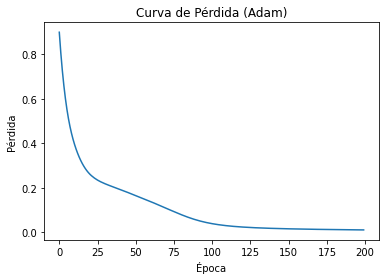

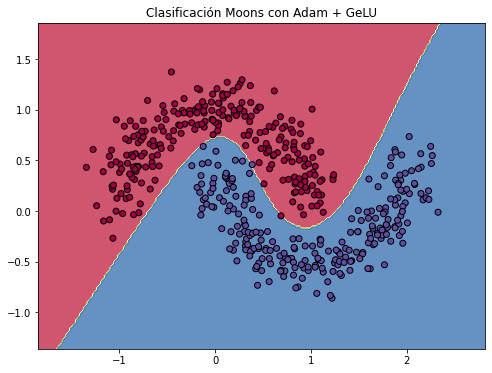

In [ ]:
# --- Configuración de Datos ---
X, y = make_moons(n_samples=500, noise=0.15, random_state=245573)
Y = np.eye(2)[y]  # One-hot encoding

# --- Definición del Modelo (Universal/PyTorch style) ---
model = Sequential(
    Linear(2, 16),
    GeLU(),
    Linear(16, 8),
    GeLU(),
    Linear(8, 2)
)

optimizer = Adam(model, lr=0.01)
criterion = CrossEntropyLoss()

# --- Entrenamiento ---
losses = train_model(X, Y, model, optimizer, criterion)

# --- Visualización ---
plt.plot(losses)
plt.title("Curva de Pérdida (Adam)")
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.show()

plot_decision_boundary(X, y, model, "Clasificación Moons con Adam + GeLU")